## Astro 304 "Galaxies"

### Chemical evolution models

In [3]:
# setup notebook for inline figures
%matplotlib inline
import numpy as np

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
plot_pretty()

### Instantaneous recycling approximation

$$
\dot{M}_{\rm g} = \dot{M}_{\rm g, in} - (1-\mathcal{R}+\eta)\, \dot{M}_{\star},
$$

Notice thtat in this simplified equation we neglect a time delay between the birth of stars and the time when they affect the ISM. Young massive stars live for $\leq 40$ Myr and neglecting such time scale compared to the cosmological time scale of Gyrs is a reasonable approximation for the outflow term $\eta\, \dot{M}_{\star}$, especially if the SFR is evolving smoothly. 

However, stellar mass loss occurs on a longer time scale and the assumption of *instantaneous recycling* - i.e. return of $\mathcal{R}$ fraction of mass turned into stars back into the ISM *instantly* is not so obvious. Below we will consider the recycling process and associated time scale in more detail. 

### Lifetime of stars of different mass and metallicity

The plot below shows lifetime of stars as a function of their mass for different metallicities (shown by lines of different color) from $0.1Z_\odot$ (red) to $2Z_\odot$ (blue), calculated using fitting formulae to the actual results of stellar evolution calculations (<a href="http://adsabs.harvard.edu/abs/1996A%26A...315..105R">Raiteri et al. 1996</a>; see notebook for code that produced this figure). As you can see the main dependence is on mass, dependence of lifetime on metallicity is very weak. 

Stars that produce energectic winds and explode as supernovae (type II) have masses $\geq 8\ M_\odot$. The figure shows that such stars live for $\leq 40$ Myrs.

<img src="http://astro.uchicago.edu/~andrey/classes/a304/fig/tlife_stars.png" align="center" width="500"></img>

### The actual recycling of gas into the ISM

would be computed as follows: 

$$\dot{M}_{\star,\rm loss}(t)=\int\limits^{m_U}_{m_{\tau=t}}[m-m_{\rm rem}(m)]\dot{M}_\star (t-\tau(m))\phi(m)dm.$$

Here $\phi(m)$ is the initial stellar mass function (IMF) assumed to be constant in time and normalized such that the total mass of the stellar population is $1\ M_\odot$:

$$\int\limits^{m_U}_{m_{\rm min}}m\,\phi(m)\,dm = 1\ M_\odot. $$ 

$m_{\rm min}\approx 0.08$ is the minimum mass of stars in a population, $m_U$ is the maximum mass of stars (can be something large like $150\ M_\odot$, $m_{\tau=t}$ is the mass of stars with lifetime $=t$, where $\tau(m)$ is lifetime of star of mass $m$, shown above. 

$m_{\rm rem}(m)$ is the mass of the long-lived remnant left by a star of initial mass $m$. Predicting this mass from models of stellar evolution is difficult because SNII explosions and violent shedding of envelopes by the stars at the tip of the AGB is not well understood. However, there are observational calibrations of this relation from observations of high-quality color-magnitude diagrams of star clusters in Milky Way and SMC (e.g., <a href="http://adsabs.harvard.edu/abs/2008ApJ...676..594K">Kalirai et al. 2008</a>): $m_{\rm rem}(m)=(0.109\pm 0.007)m + 0.394\pm 0.025$, where masses are in $M_\odot$. 

### The mass loss computed without IRA

The figure below shows the mass loss rate computed for the above equation and $m_{\rm mem}(m)$ fit for the Salpeter (1955) and Chabrier (2003) IMFs (thick lines) for a stellar population of $1\ M_\odot$ per Gyr. So to get the mass loss rate say for $10^{10}\ M_{\odot}$ worth of stars multiply the rate in the figure by this mass. 

The thin lines show a fitting formula for the mass loss proposed by Jungwiert et al. (2001): 

$$\dot{f}_{\rm loss} = \frac{C_0}{\lambda\,(1+t/\lambda)}$$

or cumulative mass loss of 

$$f_{\rm loss} = C_0\,\log(1+t/\lambda),$$

with $t$ in Myrs, and $C_0=0.046$, $\lambda=0.276$ Myr for the Chabrier (2003) IMF, and $C_0=0.032$ and $\lambda=0.51e$ for the Salpeter (1955) IMF. 

Figure shows that gas recycling is definitely not instant, but $\approx 3/4$ of the mass loss occurs in the first $100$ Myr. So on cosmological time scales IRA is not a bad approximation and simplifies modeling (even though in principle we could code up non-instantaneous recycling fairly straightforwardly). 

<img src="http://astro.uchicago.edu/~andrey/classes/a304/fig/mass_loss.png" align="center" width="600"></img>

### Model for enrichment of heavy elements

As  stars form, they form out of gas containing heavy elements present in the ISM. Thus, the gas that goes into stars also takes away heavy elements from the ISM proportionally to the gas *metallicity* $Z=M_{\rm Z}/M_{\rm g}$, i.e. star formation decreases mass of heavy elements in the ISM, $M_{\rm Z}$, at the rate $-Z\,\dot{\tilde{M}}_\star$.

The $\tilde{}$ in $\dot{\tilde{M}}_\star$ indicates that star formation rate that enters here is the mass *locked into long-lived stars* - i.e., after the stars recycle a fraction of their mass to the ISM via winds and supernovae ejecta from young stars and via AGB envelopes for older less massive stars.  

In the *instantaneous recycling approximation* this recycling is supposed to happen instantly, so that  $\dot{\tilde{M}}_\star = (1-\mathcal{R})\, \dot{M}_\star$, where $\dot{M}_\star$ is the actual instantaneous star formation rate. 

The fraction of mass returned to the ISM instantaneously is by definition
$$\mathcal{R}=\int\limits^{m_U}_{m_{\rm min}}m f_{\rm ret}(m)\,\phi(m)\,dm = \int\limits^{m_U}_{m_{\rm min}}[m-m_{\rm rem}(m)]\,\phi(m)\,dm, $$
where $f_{\rm ret}$ fraction of star of initial mass $m$ that is returned to the ISM after its evolution, $m_{\rm rem}(m)$ is the mass of long-lived remnant such star leaves behind and, as before, $\phi(m)$ is normalized to give total stellar mass of the population of $1\ M_\odot$. 

### Model for enrichment of heavy elements (cont'd)

In addition, stars produce new heavy elements in their interiors, which adds mass of the heavy elements equal to $y_{\rm Z},\dot{\tilde{M}}_\star$, where  *the true yield* $y_{\rm Z}$ is defined as

$$y_{\rm Z}=\frac{1}{1-\mathcal{R}}\int\limits_{m_\tau}^{m_U} mq_{\rm Z}(m)\phi(m)dm,$$

where $q_z$ is fraction of mass that a star of initial mass $m$ returns to the ISM in the form of *new* heavy elements that were synthesized during its evolution. 

Obviously, to know $y_{\rm Z}$ one needs to know or assume the IMF of stars, as well as model of stellar evolution and nucleosynthesis (+ dynamics of SNe remnants). Detailed calculations of these exist, but there are substantial uncertainties due to uncertainties in what happens when stars explode or shed their envelopes. These processes are inherently non-hydrostatic and thus cannot be computed reliably with 1d models.  

### Closed-box model

The change of mass of heavy elements is thus

$$\dot{M}_{\rm Z} = y_{\rm Z}\dot{\tilde{M}}_{\rm \star} - Z\,\dot{\tilde{M}}_{\rm \star}$$

or 

$$
\dot{M}_{\rm Z} = (y_{\rm Z}-Z)(1-\mathcal{R})\,\dot{M}_{\rm \star}.
$$

If there were no inflows or outflows of gas, i.e. if galaxies were evolving as *closed systems*, this equation would be the equation governing evolution of heavy element mass in galaxies. This corresponds to the so called *closed box model* of chemical evolution (<a href="http://adsabs.harvard.edu/abs/1972ApJ...173...25S">Searle & Sargent 1972)</a>.

Given what we know about galaxy formation, this model is clearly unrealistic. First, in this model galaxies are supposed to have their entire gas reservoir in place at the start of the evolution. Second, we can have no accretion of new gas or any outflow due to feedback. So why do we need to even mention this model? The reason is that the above equation can be integrated analytically (see below) and its solution provides a useful and simple *baseline* with which the actual evolution of galaxies can be compared. 

### Closed-box model: solution

We have $M_{\star+\rm g}=M_\star+ M_{\rm g}=\mathrm{const}$, so $d\tilde{M}_\star=-dM_{\rm g}$ and so multiplying the evolution equation 

$$
\dot{M}_{\rm Z} = (y_{\rm Z}-Z)\,\dot{\tilde{M}}_{\rm \star}.
$$

by $dt$ and dividing by $d\tilde{M}_\star$ gives

$$\frac{dM_{\rm Z}}{d\tilde{M}_\star} = y_{\rm Z} - Z.$$

$Z=M_{\rm Z}/M_{\rm g}$ so its differential is 

$$dZ = \frac{dM_{\rm Z}}{M_{\rm g}} - Z\frac{dM_{\rm g}}{M_{\rm g}}. $$

Multiplying it by $M_{\rm g}$ and dividing by $d\tilde{M}_\star$ we get 

$$M_{\rm g}\frac{dZ}{d\tilde{M}_{\star}} = -M_{\rm g}\frac{dZ}{dM_{\rm g}} = 
\frac{dM_{\rm Z}}{d\tilde{M}_\star} - Z\frac{dM_{\rm g}}{d\tilde{M}_{\star}} = y_{\rm Z}-Z + Z= y_{\rm Z},$$

where we used equations above in the last step. Thus, we have 

$$dZ = -y_{\rm Z}\frac{dM_{\rm g}}{M_{\rm g}},$$

which, assuming that $y_{\rm Z}=\mathrm{const}$ has the solution

$$Z(t) = Z(t_i) - y_{\rm Z}\left[\ln M_{\rm g}(t) - \ln M_{\rm g}(t_i)\right] = Z(t_i) + y_{\rm Z}\ln \left(\frac{1}{f_{\rm g}}\right), $$

where $Z(t_i)$ and $M_{\rm g}(t_i)$ are the initial metallicity and gas mass at some initial time $t_i$. If we start before any star formation $Z(t_i)=0$ and $M_{\rm g}(t_i) = M_{\star +\rm g}=\mathrm{const}$ (it's closed box!), so the ratio of final to the initial gas mass is equal to the fraction of mass in gas at any time: $M_{\rm g}(t)/M_{\rm g}(t_i) = M_{\rm g}(t)/[M_{\rm g}(t)+M_\star(t)]=f_{\rm g}(t).$

$$Z(t) = y_{\rm Z}\ln \left(\frac{1}{f_{\rm g}}\right), $$


### Effective yield

The $Z(t)$ solution for the closed box model motivates the parameter called the *effective yield* for galaxies:

$$y_{\rm eff}=\frac{Z}{\ln(1/f_{\rm g})},$$

where $Z$ is observed galaxy metallicity at a given time and $f_{\rm g}$ is the fraction of galaxy baryon mass in gaseous ISM. 

If galaxies were closed boxes their effective yields would be approximately equal to the true nucleosynthetic yield, which should not vary galaxy-to-galaxy as long as IMF does not vary: $y_{\rm eff}=y_{\rm Z}\approx \mathrm{const}$. 

Thus, by comparing $y_{\rm eff}$ for real or model galaxy to expected $y_{\rm Z}$ we can gauge whether they evolved as closed systems or not. 

### Closed box model: post scriptum

Note that the formula for $Z(t)$ in the closed box model derived above shows that as gas fraction goes to zero $Z$ can grow indefinitely. However, $Z$ is restricted to be $Z\leq 1$ by definition. <b>Q</b>: how this should be reconciled?

Note also that the closed-box formula for $Z(t)$ derived above is for the instantaneous metallicity of the ISM gas. If we have metallicity determined from a composite spectrum of stellar population of the closed box galaxy with a range of ages and metallicity, the averaged metallicity that will be inferred  is (assume $Z(t_i)=0$ and note that $df_{\rm g}=dM_{\rm g}/[M_*(t)+M_{\rm g}(t)]$ in this model): 
$$\langle Z_*\rangle=\frac{1}{M_*}\int\limits_0^{M_*}Z(M^\prime_*)dM^\prime_*=
\frac{y_{\rm Z}}{M_*}\int\ln(f^\prime_{\rm g})dM^\prime_{\rm g}
=\frac{y_{\rm Z}}{1-f_{\rm g}}f^\prime_{\rm g}
(\ln f^\prime_{\rm g}-1)|_1^{f_{\rm g}}=y_{\rm Z}\left(\frac{f_{\rm g}\ln f_{\rm 
g}}{1-f_{\rm g}}+1\right)$$

Note that the above equation indicates that *average metallicity of stars will approach the value of the true yield $y_{\rm Z}$ from below as gas fraction becomes small.*

### Metallicity evolution and inflows and outflows

Real galaxies, in general, are not closed systems and heavy elements can be driven out from the galaxy as hot, enriched gas of SN remnants escapes the ISM. 
This can, in principle, occur effectively even without much of associated total gas mass loss to the wind. In the latter case, this effectively acts as through the nucleosynthetic yield is decreased. So instead of $y_{\rm Z}(1-\mathcal{R})\dot{M}_\star$, new stars are contributing only $y_{\rm Z}(1-\mathcal{R})(1-\zeta)\dot{M}_\star$ in mass of heavy elements to the ISM, while the fraction $\zeta$ leaves the galaxy. In the case, when heavy elements are assumed to instantly mix with the ISM and  leave only as the ISM gas leaves in an outflow, $\zeta=0$. 

In addition, cold and warm gas of the ISM and the associated metals  can be driven by galactic winds at a rate $\epsilon_{\rm out}(M_{\rm Z}/M_{\rm g})\dot{M}_{\star}$.

Metallicity of the gas can also be affected by inflow of gas. If the gas accreted by halo from the IGM is already enriched, the accreted gas brings heavy elements with it at the rate  $Z_{\rm IGM}\dot{M}_{\rm g,in}$. If the metallicity of inflowing gas is smaller than that of the ISM, it will dilute the ISM metallicity, while if $Z$ of inflowing matter is larger, it will increase the metallicity. 



### Model for enrichment of heavy elements

The master equation for the evolution of mass of heavy elements in the model galaxy is

$$\dot{M}_{\rm Z} = \, \left[y_{\rm Z}(1-\mathcal{R})(1-\zeta)-(1-\mathcal{R}+\epsilon_{\rm out})M_{\rm Z}/M_{\rm g}\right]\dot{M}_{\star} + Z_{\rm IGM}\dot{M}_{\rm g,in}$$


<b>No inflow model</b> is an interesting special case. In the case when there are no inflows, $\dot{M}_{\rm g,in}=0$, this equation actually is close in form to the closed box model equation with $y_{\rm Z}(1-\zeta)$ being equivalent of yield and $[1+\epsilon_{\rm out}/(1-\mathcal{R})]Z$ being equivalent of metallicity. 

Moreover, for constant $\epsilon_{\rm out}$, we have $M_\star+M_{\rm g} + \epsilon_{\rm out}M_\star=\mathrm{const}$ and $dM_{\rm g} = - dM_\star/(1+\epsilon_{\rm out})$. 

From this, we can guess the solution: 

$$Z(t) = Z(t_i) + \frac{y_{\rm Z}}{1+\epsilon_{\rm out}}\,\ln \left(\frac{1}{f_{\rm g}}\right), $$

which shows that the effect of outflows is to reduce the gas metallicity by a factor of $1+\epsilon_{\rm out}$, the decrease which will be reflected in the *reduced effective yield:* 

$$y_{\rm eff}=\frac{Z}{\ln(1/f_{\rm g})}\leq y_{\rm Z}.$$

Thus, *observations showing $y_{\rm eff}$ significantly smaller than expected $y_{\rm Z}$ indicate that winds have reduced gas metallicity substantially during galaxy evolution.*

Although model with no inflows is no more realistic than closed box, it turns out that inclusion of inflows does not change the above conclusion, as effect of low-metallicity inflows on the yield is suprisingly small (see <a href="http://adsabs.harvard.edu/abs/2007ApJ...658..941D">Dalcanton 2007</a>). 

### Solutions of the simple models

for the metallicity-stellar mass relation and effective yield as a function of stellar mass. The models assume that star form at a rate $M_{\rm g}(t)/\tau_{\rm sf}$ with $\tau_{\rm sf}=2$ Gyrs. Outflow model assumes constant $\epsilon_{\rm out}=5$. Inflow model assumes no outflows and that gas inflows at a rate at which it is lost, so that gas mass stays constant. The figure shows that at large $Z$ models make different predictions, but at low $Z$, $M_\star-Z$ relation does not discriminate between these very different models. 

Effective yield can clearly differentiate between the model with outflows and those without. This is because outflows suppress the effective yield by a factor of $(1+\epsilon_{\rm out})$. 

<img src="http://astro.uchicago.edu/~andrey/classes/a304/fig/MsZyeff_simplemodels.png" align="center" width="600"></img>


### Observational tests of winds and chemical evolution of galaxies

Direct observations of winds are difficult and often provide a wealth of information that's difficult to interpret. Chemical abundances in galaxies (stars or ISM) and in the gas of the circumgalactic medium (CGM) provide indirect information about flows of gas in and out of galaxies. 

Observational measurements of *effective yield* in galaxies of different stellar mass is one such source of information. 

<img src="http://astro.uchicago.edu/~andrey/classes/a304/fig/tremonti_etal04_yeff.PNG" align="center" width="500"></img>


### Retained fraction of heavy elements

Another interesting probe of gas inflows and outflows is the fraction of heavy elements ever produced by stars in galaxies that are still observed in stars and the ISM of the galaxies
<a href="http://adsabs.harvard.edu/abs/2014ApJ...786...54P">Peeples et al. (2014)</a>. 

Metals ever produced can be observationally estimated using constant yield and IMF from the stellar mass of galaxies. The observed mass of metals is estimated from metallicities of stars and ISM. The fraction of retained metals can then be studied in galaxies as a function of their mass. 

<img src="http://astro.uchicago.edu/~andrey/classes/a304/fig/peeples_etal14_fZret.PNG" align="center" width="600"></img>

In simulations of galaxy formation both the mass of produced and retained metals can be measured directly and these can be used to assess effects of inflows and outflows on the abundance of heavy elements and comparisons with observations (e.g.,  
<a href="http://adsabs.harvard.edu/abs/2017MNRAS.468.4170M">Muratov et al. 2017</a>). 


### Distribution of stellar metallicities

One way to test evolution models is to compare what they predict for the distribution of metallicities in stars in a given galaxy and the actual distribution of metallicities. 

When we run the model like the one we are considering, we have solution in the form of $M_{\rm g}(t)$, $M_\star(t)$, $M_{\rm Z}(t)$, where $M_{\rm Z}$ is mass of heavy elements. Thus for each time step $\Delta t$ from $t$ to $t+\Delta t$, we know $\delta M_\star$ and we know metallicity $Z(t)=M_{\rm Z}(t)/M_{\rm g}(t)$ with which this new mass of stars was formed. Hence, the model predict distribution of metallicities of stars formed by given time $t$. This distribution can be contrasted with data. 

When people compared simpler chemical evolution models - i.e., without modeling cosmological mass accretion and star formation explicitly - to observed distribution of metallicities of stars in the Milky Way disk, they identified what's known as the *G-dwarf problem* (<a href="http://adsabs.harvard.edu/cgi-bin/bib_query?1962AJ.....67..486V">van den Bergh 1962</a>).

### The G-dwarf problem

However, for the Milky Way the closed-box and simple outflow model *predict metallicity distribution that overpredicts number of low-metallicity long-lived stars (G dwarfs) by a lot*, which is known as the *G-dwarf problem*. In other words, there are way fewer low-metallicity stars in the Milky Way disk than the closed box model predicts. This problem was pointed out by <a href="http://adsabs.harvard.edu/cgi-bin/bib_query?1962AJ.....67..486V">van den Bergh (1962)</a>. 

Another way to state the problem is that observed *distribution of metallicities of low-mass stars in the Milky Way disk is too peaked near solar metallicity.* The closed box model, however, predicts a significant tail of low-$Z$ stars. This is shown in the figure below (you can find code that produced it in the notebook):

<img src="http://astro.uchicago.edu/~andrey/classes/a304/fig/Zsdist_dwarf_problem.png" align="center" width="600"></img>

The figure actually shows recent measurements of M-dwarf metallicity-distribution from <a href="http://adsabs.harvard.edu/abs/2012MNRAS.422.1489W">Woolf & West (2012)</a> (see their Fig 2 and Table 2). It has noe been shown that <a href="http://astrobites.org/2012/02/15/and-now-theres-a-problem-with-m-dwarfs-too/">similar problem exists for K- and M-dwarfs</a>, which are longer lived stars so probe earlier stages of enrichment. The "problem" also exist in other galaxies (e.g., <a href="http://adsabs.harvard.edu/cgi-bin/bib_query?1996AJ....112..948W">Worthey et al. 1996</a>). 

A number of different explanations were developed for this discrepancy. They are related to the fact that real galaxies have inflows and outflows. We know that models with just outflows of constant loading factor behave like closed box models, but with lower metallicity. Thus, constant mass loading factor outflows cannot change the distribution of metallicities. Thus, a combination of inflows and mass-dependent loading factors is required to explain the distribution of metallicities of stars. 

### Gas recycling by galaxies and deuterium abundance

Deuterium or D (nucleous of proton and neutron + electron if it is neutral) is synthesized during the Big Bang nucleosynthesis. D is the first element that ignites when stars form and star nuclear fusion in their centers. Because stars at this stage are still fully convective, D is burned not only in the center, but throughout the star (convection brings outer layers to the center, so there is nowhere for deuterium to hide). Thus, D that ends up in stars is completely destroyed. 

Yet, deuterium is observed via its absorption lines in the ISM of our galaxy, in other galaxies, and in the intergalactic medium in spectra of quasars. The fact that D is not fully destroyed in galaxy ISM, means that the ISM gas was not fully cycled through the stars. Given that gas consumption time scale is $\sim$ few Gyrs, this by itself indicates that there must have been inflows. Measurements of deuterium abundance thus give us an idea bout the relative role of outflows in galaxies. 

Recent analysis by <a href="https://arxiv.org/abs/1604.07434">Weinberg (2016)</a> shows in the Milky Way deuterium abundance is $\approx 0.87$ of the primordial value. I.e., $\approx 90\%$ of the gas in our Galaxy is pristine - i.e., 90\% of atoms in the ISM came straight from the Big Bang and have not been inside stars. 

Similar results are obtained in modern galaxy formation simulations <a href="http://adsabs.harvard.edu/abs/2017arXiv170408254V">van de Voort et al. (2017)</a>. 

C:\Users\h2_sf\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: divide by zero encountered in divide
C:\Users\h2_sf\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: divide by zero encountered in divide
C:\Users\h2_sf\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: invalid value encountered in divide
C:\Users\h2_sf\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:41: RuntimeWarning: divide by zero encountered in divide
C:\Users\h2_sf\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:47: RuntimeWarning: divide by zero encountered in divide


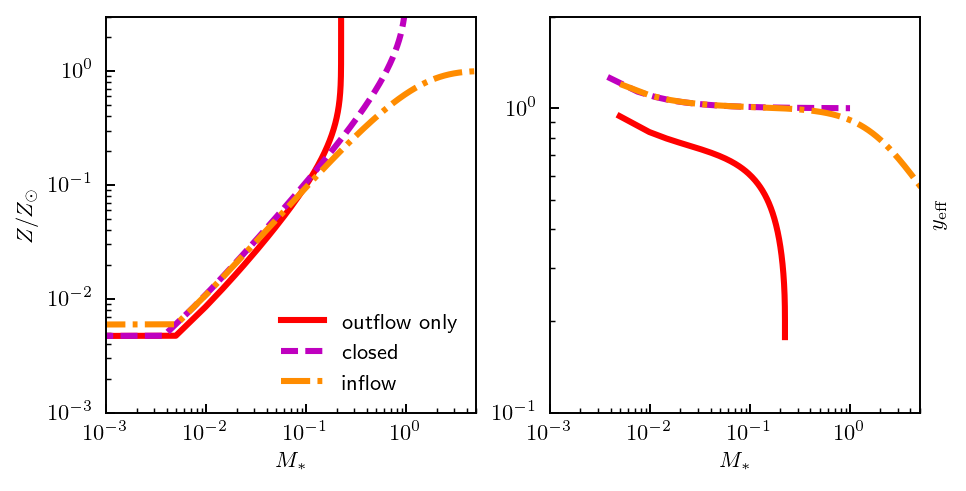

In [21]:
from scipy.integrate import odeint
from scipy.integrate import quad
from scipy.interpolate import UnivariateSpline

def M_gas(mg,t, sfr, a, Rloss, tdep):
    # chemical evolution model with no inflow, but with outflow dMout/dt = a*dM*/dt
    Mgas = -(1.0+a)*(1.0-Rloss)*sfr(t,mg, tdep)
    #print Mgas, mg, Rloss, a, sfr(t,mg)
    return Mgas

def sfr_ks(t, mg, tdep):
    # SFR via simple KS-like relation
    return mg/tdep

tu = 13.65
t_output = np.arange(0., tu, 0.01)
#t_output = [0.,1.6]
y0 = np.array([1.])

sfr = sfr_ks
a = 5.0; Rloss = 0.25; tdep = 2.0
Mgasout = odeint(M_gas, y0, t_output, args=(sfr, a, Rloss, tdep))
Mgasout = np.clip(Mgasout[:,0],0.0,1.e100)
sfr = UnivariateSpline(t_output,Mgasout/tdep,s=0)

msmout = []
for t in t_output: 
    msmout.append(sfr.integral(0.,t))
msmout = np.array(msmout)

ytrue = 1.0; 
Zout = 1.e-3 + ytrue/(1.+a)*np.log(y0[0]/Mgasout)
fgout = Mgasout/(Mgasout+msmout)
yeffout = Zout/np.log(1./fgout)

a = 0.; 
Mgascl = odeint(M_gas, y0, t_output, args=(sfr_ks, a, Rloss, tdep))
msmcl = y0[0] - Mgascl
fgcl = Mgascl/(Mgascl+msmcl)
Zcl = 1.e-3 + ytrue/(1.+a)*np.log(y0[0]/Mgascl)
yeffcl = Zcl/np.log(1./fgcl)

Mgasin = y0[0]*np.ones(len(t_output))
msmin = y0[0]/tdep*t_output
fgasin = Mgasin/(Mgasin+msmin)
Zin = 1.e-3 + ytrue*(1.0-np.exp(1.0-(msmin+y0[0])/y0[0]))
yeffin = Zin/np.log(1.0/fgasin)
#
# plot
#
fig,ax = plt.subplots(1,2, figsize=(6, 3))

ax[0].set_xlabel(r'$M_*$'); ax[0].set_ylabel(r'$Z/Z_\odot$')
ax[0].set_xscale('log'); ax[0].set_yscale('log')
ax[0].set_xlim(0.001, 5.); ax[0].set_ylim(1.e-3, 3.0)

ax[0].plot(msmout, Zout, c='r', lw=2.5, label=r'outflow only')
ax[0].plot(msmcl, Zcl,'--', c='m', lw=2.5, label=r'closed')
ax[0].plot(msmin, Zin, '-.', c='darkorange', lw=2.5, label=r'inflow')
ax[0].legend(frameon=False, loc='lower right',fontsize=9)

ax[1].set_xlabel(r'$M_*$'); ax[1].set_ylabel(r'$y_{\rm eff}$')
ax[1].set_xscale('log'); ax[1].set_yscale('log')
ax[1].set_xlim(0.001, 5.); ax[1].set_ylim(1.e-1, 2.)
ax[1].yaxis.set_label_position('right')

ax[1].plot(msmout, yeffout,  c='r', lw=2.5, label=r'outflow only')
ax[1].plot(msmcl, yeffcl, '--', c='m', lw=2.5, label=r'closed')
ax[1].plot(msmin, yeffin, '-.', c='darkorange', lw=2.5, label=r'inflow')

#ax[1].legend(frameon=False, loc='lower left',fontsize=9)
plt.savefig('fig/MsZyeff_simplemodels.png', bbox_inches='tight')
plt.show()


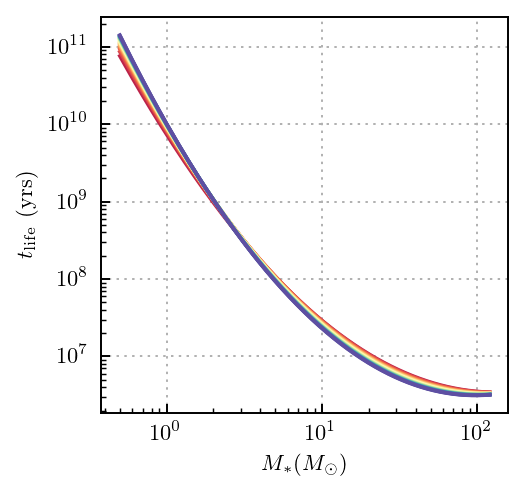

In [12]:
#
# This script computes lifetimes of stars using fitting 
# formulae of Raiteri et al. (1996) describing results of stellar evolution
# calculations
#
import matplotlib.cm as cm
import matplotlib.colors as colors

Z = np.arange(0.002,0.04, 0.002)
M = np.arange(0.5,120.,0.1)

# lifetime of stars using fitting formulae from Raiteri et al. (1996)
lM = np.log10(M); lM2 = lM * lM 

fig1 = plt.figure(figsize=(3,3))
#plt.xlim(0.9*np.min(M), 1.1*np.max(M))
plt.xscale('log'); plt.yscale('log')
cNorm  = colors.Normalize(vmin=0, vmax=len(Z)-1)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm.Spectral)

curline = 0 
for zd in Z: 
    lz = np.log10(zd); lz2 = lz*lz
    a0 = 10.13  + 0.07547 * lz - 0.008084 * lz2
    a1 = -4.424 - 0.7939  * lz - 0.1187   * lz2
    a2 =  1.262 + 0.3385  * lz + 0.05417  * lz2
    logt = a0 + a1 * lM + a2 * lM2
    curline += 1 
    colorVal = scalarMap.to_rgba(curline)

    plt.plot(M,10.**logt,linewidth=1.5,c=colorVal,label='zd')

plt.xlabel(r'$M_* (M_{\odot})$')
plt.ylabel(r'$t_{\rm life}\ \rm(yrs)$')
plt.grid(linestyle=':')

#plt.savefig('fig/tlife_stars.png', bbox_inches='tight')
plt.show()

In [4]:
#
# routines to compute stellar mass loss 
# without instantaneous recycling approximation
#
from scipy.integrate import quad

def psi_tau(t, tau=1.0, tU=13.6):
    """
    input: t,tau in Gyrs
    output: SFR in Msun/yr normalized to 1 Msun
    """
    if t < 0:
        return 0.0
    else: 
        A_tau = 1.0/(1.0-np.exp(-tU/tau))/tau
        psi_tau = A_tau*np.exp(-t/tau)
        psi_tau = np.clip(psi_tau, 0.0, 1.e9)
        return psi_tau
    
def imf_salpeter(m):
    m_max = 150.; m_min = 0.1
    Asalp = -0.35/(m_max**(-0.35)-m_min**(-0.35))
    return Asalp*np.power(m,-2.35)

def imf_chabrier03(m):
    # Chabrier 2003, PASP review
    if m < 1.0:
        A = 0.158; mc = 0.079; sig = 0.69
        dummy = A*np.exp(-0.5*(np.log10(m/mc))**2/sig/sig)/m
    else:
        dummy = 4.43e-2 * np.power(m,-2.3)
    return dummy

def ch03_int(m):
    return m*imf_chabrier03(m)

def mfinal(m):
    # based on the fit of Kalirai et al. 2008
    return 0.109*m+0.394
    
def tlife(m, Z=0.02):
    """
    input: star mass, metallicity
    output: lifetime on main sequence in log(yrs)
    based on approximations of Raitieri et al. 1996
    """
    lz = np.log10(Z); lz2 = lz*lz
    lM = np.log10(m); lM2 = lM*lM
    a0 = 10.13  + 0.07547 * lz - 0.008084 * lz2
    a1 = -4.424 - 0.7939  * lz - 0.1187   * lz2
    a2 =  1.262 + 0.3385  * lz + 0.05417  * lz2
    logt = a0 + a1 * lM + a2 * lM2
    return logt
    
def mloss_int(m, t, tau, imf='chabrier03', Z=0.01, tU=13.6):
    if imf == 'salpeter':
        phim = imf_salpeter(m)
    elif imf == 'chabrier03':
        phim = imf_chabrier03(m)
    else:
        print "error in mloss_int: imf %s is not implemented"%imf
    dummy = (m-mfinal(m))*psi_tau(t-10.**(tlife(m, Z)-9.0),tau,tU)*phim

    #if imf == 'chabrier03' and t>0.2:
    #    print t, m, t-10.**(tlife(m, Z)-9.0), psi_tau(t-10.**(tlife(m, Z)-9.0),tau,tU), phim

    return dummy
    
Z = 0.01
mmax = 150.; tau = .1; tU = 13.6

#t = np.arange(0.0,13.,0.005)
lt = np.linspace(-4.,np.log10(tU),200)
t = 10.**lt
# grid of masses from H-burning limit to some reasonable max. mass
m = np.arange(0.08,150.,0.01)
# tabulate lifetimes for m(t) interpolation
tl = tlife(m,Z)
print "tlmin, tlmax=", np.min(tl), np.max(tl)

from scipy import interpolate
tl_sp = interpolate.interp1d(tl, m)

def tlsp(t):
    if t < 6.6 : md = 150.
    else: 
        #print t
        md = tl_sp(t)
    return md 

def mloss(t, imf='salpeter'):
    mlrate = np.zeros_like(t)

    for i, td in enumerate(t):
        ltd = np.log10(td*1.e9)
        mmin = tlsp(ltd)
        mlrate[i] = quad(mloss_int, mmin, mmax, args = (td, tau, imf, Z, tU))[0]
        #print td, mmin, mlrate[i]

    mlsp = interpolate.splrep(t,mlrate)

    mlcum = np.zeros_like(t)
    for i, td in enumerate(t):
        mlcum[i] = interpolate.splint(0., td, mlsp)

    return mlrate, mlcum

# compute mass loss for Salpeter IMF
mlrates, mlcums = mloss(t, 'salpeter')

# now Chabrier 2003 IMF
mlratech, mlcumch = mloss(t, 'chabrier03')

# normalize the rates properly (i.e, normalize IMF to 1 Msun)
Ach = quad(ch03_int,0.1,mmax)[0]
mlratech /= Ach; mlcumch /= Ach


tlmin, tlmax= 6.52805289708 14.5431837098


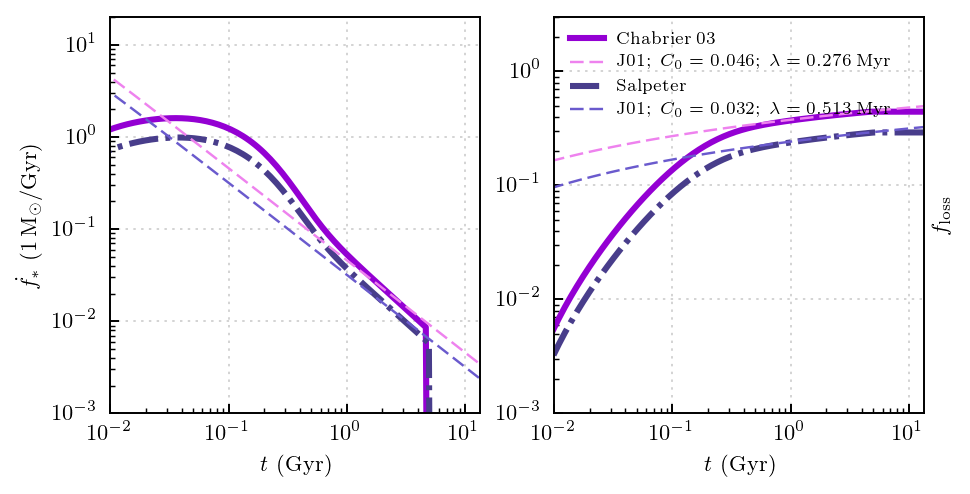

In [6]:
# approximation of Jungwiert et al. 2001
def floss(td, C0, lam):
    return C0*np.log(td/lam + 1.0) 

ltd = np.linspace(-2.5,1.3,100)
td = 10.**ltd
# Chabrier 03 IMF
C0 = 0.046; lam = 2.76e5
flch03 = floss(td*1.e9, C0, lam)
rch03 = C0/lam/(1.+td*1.e9/lam) * 1.e9

# Salpeter 1955 IMF
C0 = 0.032; lam = 5.13e5
fls55 = floss(td*1.e9, C0, lam)
rs55 = C0/lam/(1.+td*1.e9/lam) * 1.e9

# plot
fig, ax = plt.subplots(1, 2, figsize=(6,3))
ax[0].set_xscale('log'); ax[0].set_yscale('log')
ax[0].set_xlabel(r'$t\ \rm(Gyr)$'); 
ax[0].set_ylabel(r'$\dot{f}_*\ (1\mathrm{\,M_\odot/Gyr})$')
ax[0].set_xlim(0.01,13.5); ax[0].set_ylim(0.001,20.)
ax[0].plot(t, mlratech, c='darkviolet', lw=2.5, label=r'$\rm Chabrier\ 03$')
ax[0].plot(t, mlrates, '-.', c='darkslateblue', lw=2.5, label=r'$\rm Salpeter$')
ax[0].plot(td, rch03, '--',  c='violet', lw=1, label=r'$\rm Jungwiert\ et\ al.\  01\ approx$')
ax[0].plot(td, rs55, '--',  c='slateblue', lw=1, label=r'$\rm Jungwiert\ et\ al.\  01\ approx$')
ax[0].grid(linestyle='dotted', c='lightgray')

ax[1].set_xscale('log'); ax[1].set_yscale('log')
ax[1].set_xlabel(r'$t\ \rm(Gyr)$'); 
ax[1].set_ylabel(r'$f_{\rm loss}$')
ax[1].yaxis.set_label_position('right')
ax[1].set_xlim(0.01,13.5); ax[1].set_ylim(0.001,3.)
ax[1].plot(t, mlcumch,  c='darkviolet', lw=2.5, label=r'$\rm Chabrier\ 03$')
ax[1].plot(td, flch03, '--',  c='violet', lw=1, label=r'$\mathrm{J01};\ C_0= 0.046;\ \lambda= 0.276\ \rm Myr$')
ax[1].plot(t, mlcums, '-.', c='darkslateblue', lw=2.5, label=r'$\rm Salpeter$')
ax[1].plot(td, fls55, '--', c='slateblue', lw=1, label=r'$\mathrm{J01};\ C_0= 0.032;\ \lambda= 0.513\ \rm Myr$')
ax[1].grid(linestyle='dotted', c='lightgray')

ax[1].legend(frameon=False, loc='upper left', fontsize=7)
#plt.savefig('fig/mass_loss.png', bbox_inches='tight')
plt.show()
